# Понижение размерности данных с помощью метода главных компонент и сингулярного разложения
Группа: ИВТ-М20.<br/>
Студент: Лискунов Роман Геннадьвич

In [64]:
import warnings
from math import isnan
from pprint import pprint
from typing import Any, Union

import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import (
    DataFrame,
    read_csv, Series
)
from sklearn.linear_model import (
    LogisticRegression,
    SGDClassifier,
    RidgeClassifier
)
from sklearn.metrics import (
    r2_score,
    mean_absolute_error
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)

In [65]:
warnings.filterwarnings('ignore')
mpl.style.use(['ggplot'])

## Прочтите данные из файлов

In [66]:
sop1: DataFrame = DataFrame(
    read_csv(
        "data/train/SOP1.dat",
        sep=" ",
        header=0
    )
)
sop1.name = "SOP1"

In [67]:
sop2: DataFrame = DataFrame(
    read_csv(
        "data/train/SOP2.dat",
        sep=" ",
        header=0
    )
)
sop2.name = "SOP2"

In [68]:
sop3: DataFrame = DataFrame(
    read_csv(
        "data/train/SOP3.dat",
        sep=" ",
        header=0
    )
)
sop3.name = "SOP3"

In [ ]:
target1: DataFrame = DataFrame(
    read_csv(
        "data/train/target1.csv",
        sep=",",
        header=0
    )
)
target1.name = "target1"

In [69]:
target2: DataFrame = DataFrame(
    read_csv(
        "data/train/target2.csv",
        sep=",",
        header=0
    )
)
target2.name = "target2"

In [70]:
target3: DataFrame = DataFrame(
    read_csv(
        "data/train/target3.csv",
        sep=",",
        header=0
    )
)
target3.name = "target3"

##  Отобразите несколько первых и несколько последних записей.

In [71]:
def printer(variable: DataFrame) -> None:
    pprint(variable.name)
    print(end="\n")
    pprint(variable.head())
    print(end="\n\n")
    pprint(variable.tail())
    print(end="\n\n\n\n")

In [72]:
printer(sop1)

'SOP1'

   0000  29-08-03  12:34:21  +20C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0     1         0        35   202          27          29   35           0   
1     2         0        23   190          27          22   29           0   
2     3         1         0   188          24          10   13           0   
3     4         5         0   183          26           6    1           0   
4     5         4         0   188          32           4    0           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11   16  Unnamed: 13  Unnamed: 14  \
0           0  255          147           54  119          125          212   
1           0  255          147           56   95          156          223   
2           0  255          145           59   40          172          254   
3           0  255          153           66   22          172          255   
4           0  255          157           62   18          170          255   

    5  ���1  Unnamed: 17  
0  17    39          

In [73]:
printer(sop2)

'SOP2'

   0000  29-08-03  13:00:27  +23C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0     1         0         0   175          12           0    0           0   
1     2         0         0   159          10          10    0           0   
2     3         0         0   139          25          48    0           0   
3     4         0         0   130          54          61    0           0   
4     5         0         0   110          54          57    0           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11  16  Unnamed: 13  Unnamed: 14  \
0           0  255          112            0   0          233          173   
1           0  255          108            0   0          222          173   
2           0  255          145            0   0          230          175   
3           0  255          216            0   1          237          185   
4           0  236          207            3   4          239          205   

    5  ���2  Unnamed: 17  
0   2    23          NaN  


In [74]:
printer(sop3)

'SOP3'

   0000  29-08-03  13:49:13  +21C  Unnamed: 4  Unnamed: 5  257  Unnamed: 7  \
0     1         0         0     0          10         148   56           0   
1     2         0         0     0          28         129   55           0   
2     3         0         0     0          48          94   58          13   
3     4         0         0     0          54          68   51           0   
4     5         0         0     0          81          46   36           0   

   Unnamed: 8  325  Unnamed: 10  Unnamed: 11  16  Unnamed: 13  Unnamed: 14  \
0           3   39          118            0   4           88          154   
1           0   48          150            0   0           67          140   
2           0   16          210            0   0           47           98   
3           0   18          244            2   0           37           73   
4           0   16          255           11   0           41           58   

    5  ���3  Unnamed: 17  
0  49    14          NaN  


In [75]:
printer(target1)

'target1'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              51           42.0               7           L       A
1             200           40.0               6           L       B
2             278           39.0               4           L       A
3             365           43.0               6           L       B
4             460           27.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
3             365           43.0               6           L       B
4             460           27.0               5           L       A
5             845           36.0               4           L       B
6             959           62.0               6           L       A
7             141            NaN               4           T        






In [76]:
printer(target2)

'target2'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0             178           37.0               6           L       B
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
1             258           38.0               4           L       A
2             337           53.0               5           L       B
3             822           37.0               5           L       B
4             957           48.0               5           L       A
5             123            NaN               3           T        






In [77]:
printer(target3)

'target3'

   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
0              26           42.0               5           L       A
1             172           47.0               6           L       B
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A


   Начало дефекта  Длина дефекта  Высота дефекта Тип дефекта Сторона
2             276           55.0               8           L       B
3             795           34.0               8           L       B
4             877           49.0               4           L       A
5             971           50.0               5           L       B
6             112            NaN               4           T        






##  Ящик с усами и временные реализации.

In [78]:
def box(variable: DataFrame) -> None:
    fig, ax = plt.subplots()
    ax.set_title(f"{variable.name}")
    ax.boxplot(variable)


def hist(variable: DataFrame) -> None:
    fig, ax = plt.subplots()
    ax.set_title(f"{variable.name}")
    ax.hist(variable)

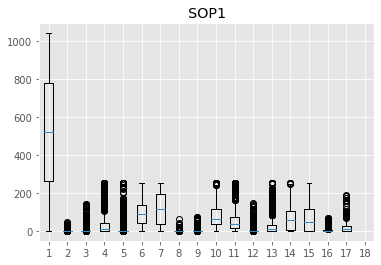

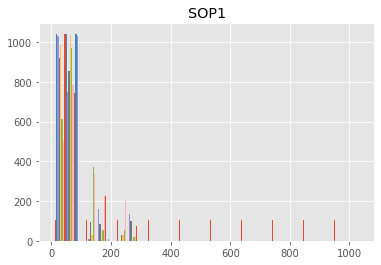

In [79]:
box(sop1)
hist(sop1);

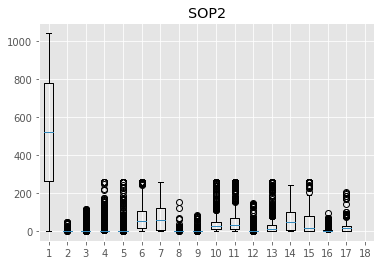

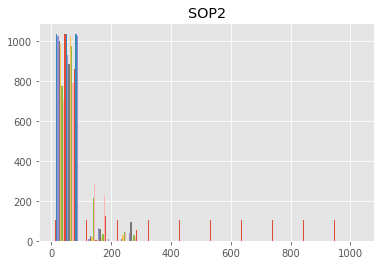

In [80]:
box(sop2)
hist(sop2);

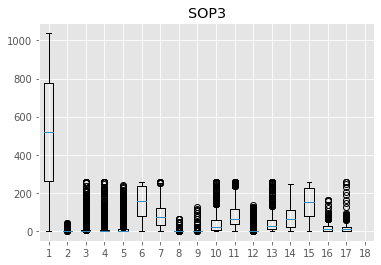

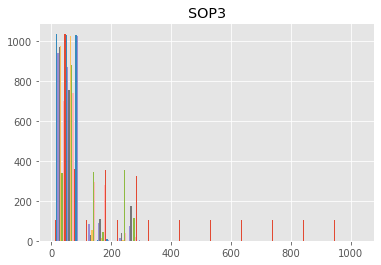

In [81]:
box(sop3)
hist(sop3);


## Вектор с результатами наличия дефектов

In [82]:
array = [0] * sop1.count()[0]
ser1: Series = Series(data=array)
ser2: Series = Series(data=array)
ser3: Series = Series(data=array)

In [83]:
def defects(target, series):
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = 1
    return series

In [84]:
ser1 = defects(target1, ser1)
ser2 = defects(target2, ser2)
ser3 = defects(target2, ser3)

## Вектор, содержащий значения высоты дефектов в местах их наличия

In [85]:
def defects_height(target, series):
    for index, row in target.iterrows():
        begin = row['Начало дефекта']
        end = row['Начало дефекта'] + row['Длина дефекта']
        if not isnan(end):
            series.loc[begin:int(end)] = row['Высота дефекта']
    return series

In [86]:
ser1 = defects_height(target1, ser1)
ser2 = defects_height(target2, ser2)
ser3 = defects_height(target3, ser3)

## Разбиение данных на обучающую и проверочную выборки

In [87]:
var_train, var_test, target_train, target_test = train_test_split(var, target['data'], test_size=0.3, train_size=0.7)

NameError: name 'var' is not defined

## Последовательное применение алгоритмов

In [ ]:
print("LogisticRegression")
lr: LogisticRegression = LogisticRegression()
lr.fit(var_train, target_train)

In [ ]:
print("SGDClassifier")
sgdc: SGDClassifier = SGDClassifier()
sgdc.fit(var_train, target_train)

In [ ]:
print("RidgeClassifier")
rc: RidgeClassifier = RidgeClassifier()
rc.fit(var_train, target_train)

## Оценка качества модели

In [ ]:
def estimate(classifier, ttest, vtest):
    pred: object = classifier.predict(vtest)
    print(f"r2_score: {round(r2_score(ttest, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(ttest, pred), 3)}")

In [ ]:
print("LogisticRegression")
estimate(lr, target_test, var_test)

In [ ]:
print("SGDClassifier")
estimate(sgdc, target_test, var_test)

In [ ]:
print("RidgeClassifier")
estimate(rc, target_test, var_test)

## Подбор гиперпараметров

In [ ]:
print("LogisticRegression")
parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}
grid: GridSearchCV = GridSearchCV(
    LogisticRegression(),
    parameters,
    cv=5
)
lr_grid: Union[GridSearchCV, Any] = grid.fit(var_train, target_train)
print(lr_grid)

In [ ]:
print("SGDClassifier")
parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
    'alpha': [10 ** x for x in range(-6, 1)],
    'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
}
grid: GridSearchCV = GridSearchCV(
    SGDClassifier(),
    parameters,
    cv=5
)
sgdc_grid: Union[GridSearchCV, Any] = grid.fit(var_train, target_train)
print(sgdc_grid)

In [ ]:
print("RidgeClassifier")
parameters: dict[str, Union[list[str], list[Union[float, int]]]] = {
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}
grid: GridSearchCV = GridSearchCV(
    RidgeClassifier(),
    parameters,
    cv=5
)
rc_grid: Union[GridSearchCV, Any] = grid.fit(var_train, target_train)
print(rc_grid)

## Заново обучите модель с подобранными гиперпараметрам

In [ ]:
def relearn(classifier, ttest, vtest) -> None:
    print(classifier.best_params_)
    print(classifier.best_score_)
    pred: object = classifier.predict(vtest)
    print(f"r2_score: {round(r2_score(ttest, pred), 3)}")
    print(f"mean_absolute_error: {round(mean_absolute_error(ttest, pred), 3)}")

In [ ]:
print("LogisticRegression")
relearn(lr_grid, target_test, var_test)

In [ ]:
print("SGDClassifier")
relearn(sgdc_grid, target_test, var_test)

In [ ]:
print("RidgeClassifier")
relearn(rc_grid, target_test, var_test)

# Ответы на контрольные вопросы

### 1. Что такое система ПУЗК? Какие основные методы УЗК реализуются в данной системе?

### 2. Чем отличается эхо-метод от теневого и эхо-контактного метода УЗК?

### 3. Какие типы дефектов можно найти с помощью системы ПУЗК?